<h1>Solana Analysis</h1>
<h2>p-amara</h2>



<p> I conducted a 70/30 split on the csvs. The 70 one is for training the model and the 30 one is for testing the model. I found out where to split the data by doing 452 x 70%. When I found out that figure, I understood that the remainder would have been 30%</p>

<p> I also removed things in the dataset that weren't numbers</p>
<p>I remoived the index column</p>

<p> I will now conduct a small analysis on the data</p>

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
solana = pd.read_csv("20106827.csv", index_col ="SNo")


In [26]:
solana.head()

,Date,High,Low,Open,Close,Volume,Marketcap
SNo,,,,,,,
1,11/04/2020 23:59,1.049073,0.765020,0.951054,0.776819,43862443.79,0.0
2,12/04/2020 23:59,0.956670,0.762426,0.785448,0.882507,38736897.02,0.0
3,13/04/2020 23:59,0.891603,0.773976,0.890760,0.777832,18211285.47,0.0
4,14/04/2020 23:59,0.796472,0.628169,0.777832,0.661925,16747614.12,0.0
5,15/04/2020 23:59,0.704964,0.621531,0.669289,0.646651,13075275.29,0.0


In [27]:
solana.describe()

,High,Low,Open,Close,Volume,Marketcap
count,452.000000,452.000000,452.000000,452.000000,4.520000e+02,4.520000e+02
mean,11.190482,9.647555,10.400225,10.471388,1.956751e+08,2.588164e+09
std,15.148788,13.006301,14.082328,14.114444,3.906998e+08,3.985932e+09
min,0.559759,0.505194,0.513391,0.515273,6.520201e+05,0.000000e+00
25%,1.484753,1.311024,1.410480,1.424761,7.851473e+06,3.056948e+07
50%,3.018518,2.483870,2.867550,2.881389,1.858893e+07,1.042625e+08
75%,15.270240,13.774265,14.262057,14.362851,1.802343e+08,3.811371e+09
max,58.302927,46.187557,56.089257,55.910960,2.772225e+09,1.524342e+10


In [28]:
solana.shape

(452, 7)

In [29]:
solana.dtypes

Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object

In [30]:
close_px = solana['Close']
mavg = close_px.rolling(window=10).mean()

In [31]:
close_px

SNo
1       0.776819
2       0.882507
3       0.777832
4       0.661925
5       0.646651
         ...    
448    34.020482
449    34.478816
450    34.310601
451    32.984588
452    34.269140
Name: Close, Length: 452, dtype: float64

In [32]:
mavg

SNo
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
         ...    
448    32.134654
449    32.577646
450    32.890603
451    33.319176
452    33.774804
Name: Close, Length: 452, dtype: float64

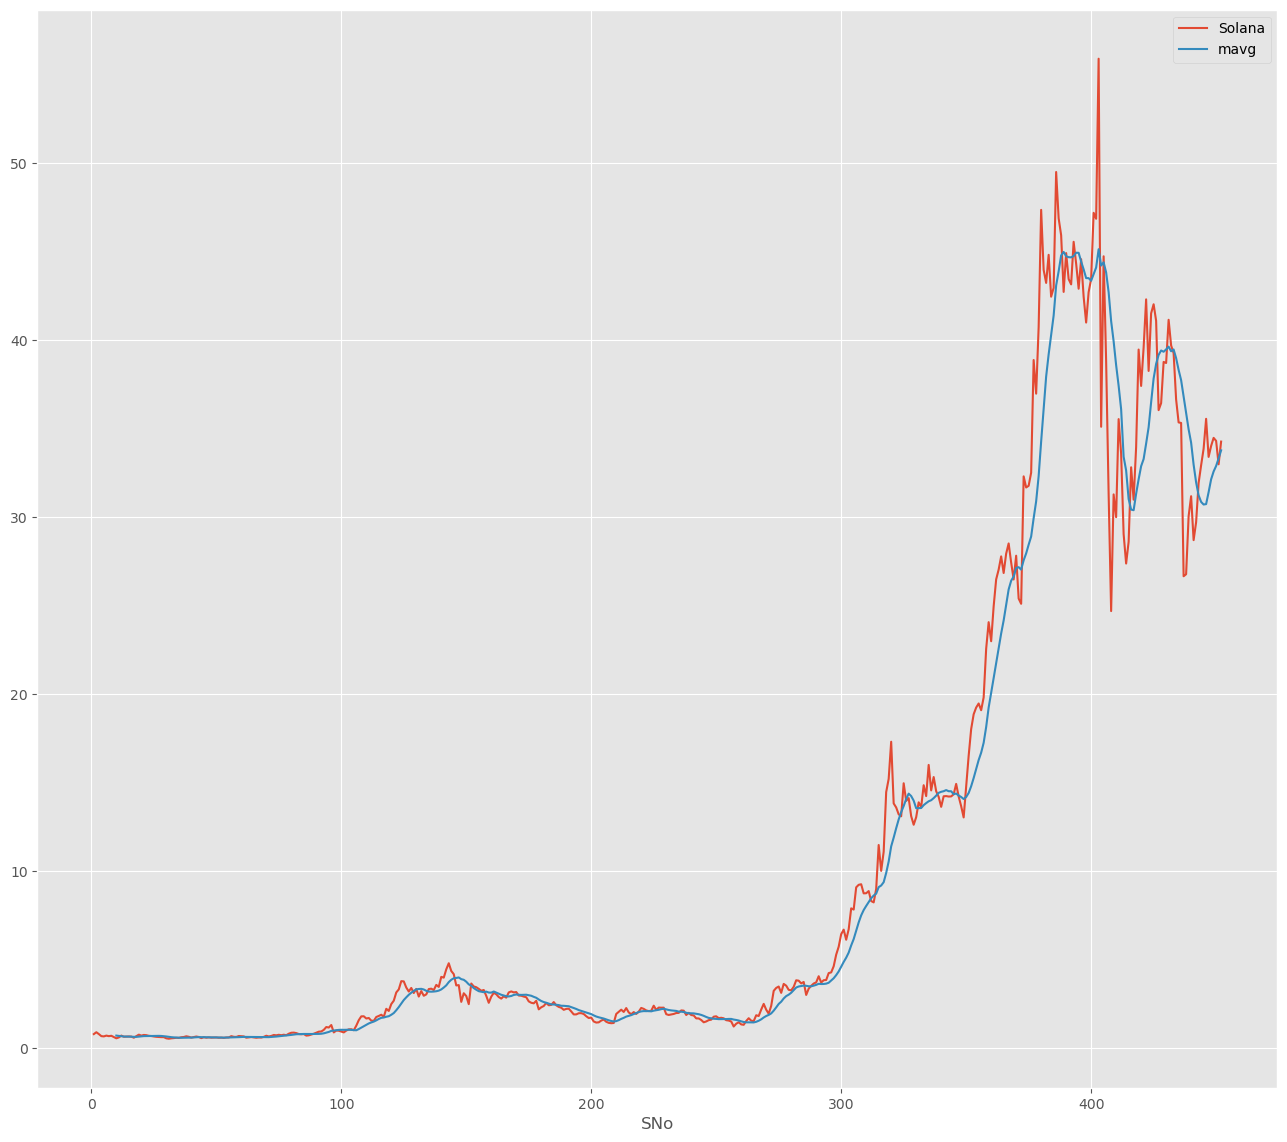

In [33]:
#Plotting
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(16, 14))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='Solana')
mavg.plot(label='mavg')
plt.legend()

<Axes: xlabel='SNo'>

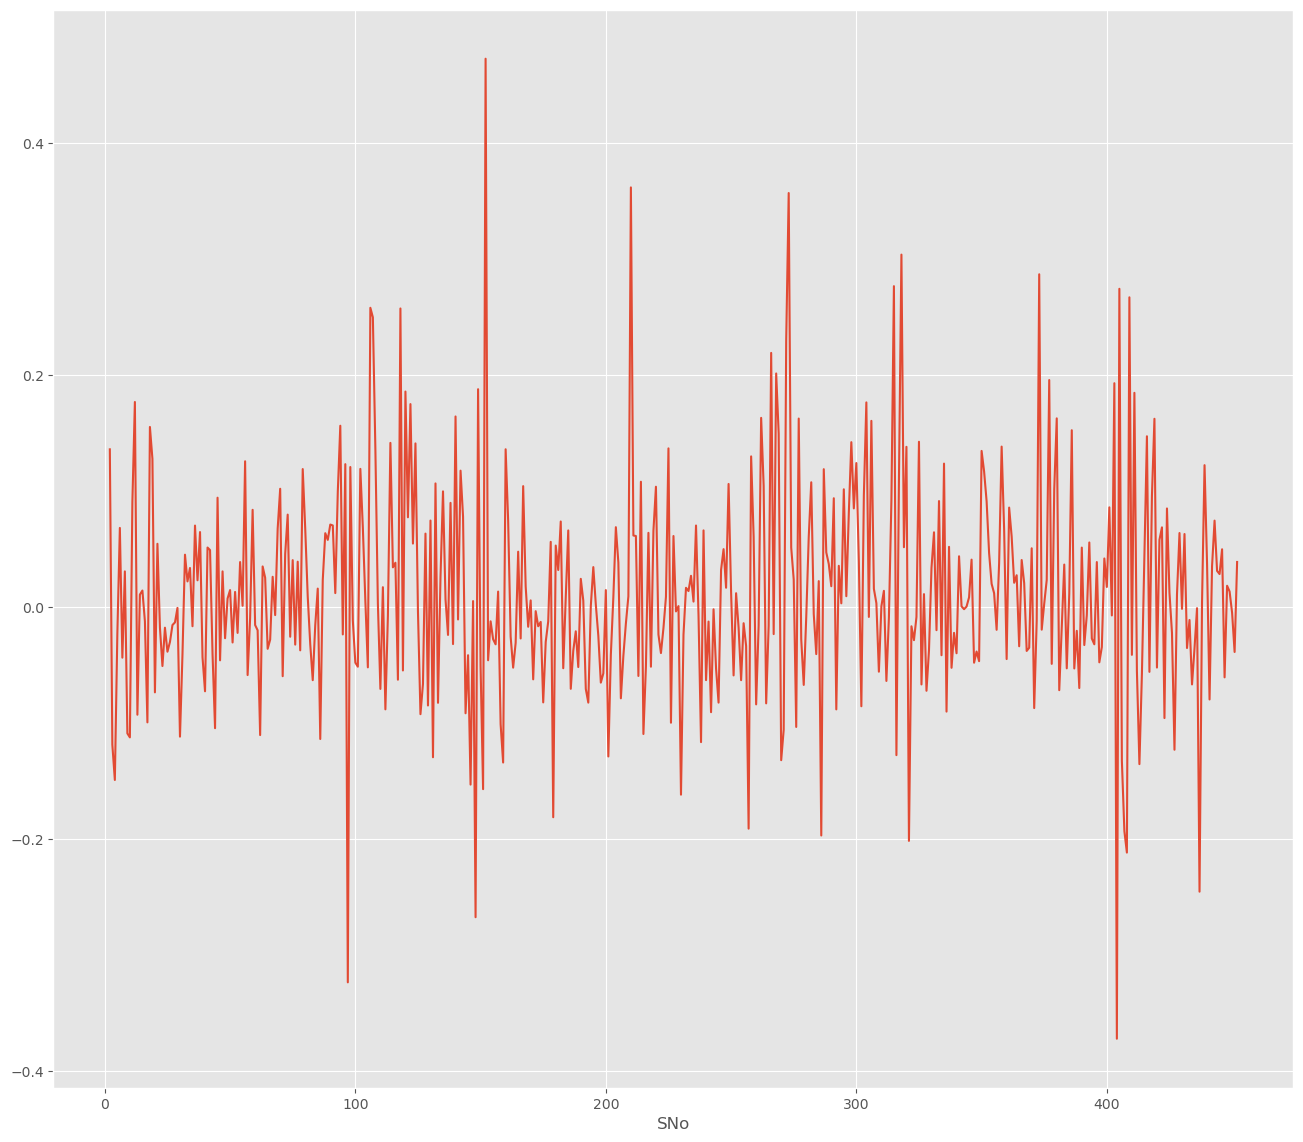

In [34]:
rets = close_px / close_px.shift(1)-1
rets.plot(label='return')

In [41]:
solana_train = pd.read_csv("20106827_train.csv", index_col="Date")

#converting floats to int in order to fit KNN classifier
cols = ['Close', 'Open', 'High', 'Low', 'Marketcap', 'Volume']
solana_train[cols] = solana_train[cols].applymap(np.int64)
solana_train.head()

,SNo,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,
11/04/2020 23:59,1,1,0,0,0,43862443,0
12/04/2020 23:59,2,0,0,0,0,38736897,0
13/04/2020 23:59,3,0,0,0,0,18211285,0
14/04/2020 23:59,4,0,0,0,0,16747614,0
15/04/2020 23:59,5,0,0,0,0,13075275,0


In [42]:
target_name = "Open"
target = solana_train[target_name]
target

Date
11/04/2020 23:59     0
12/04/2020 23:59     0
13/04/2020 23:59     0
14/04/2020 23:59     0
15/04/2020 23:59     0
                    ..
16/02/2021 23:59     8
17/02/2021 23:59     8
18/02/2021 23:59     8
19/02/2021 23:59     8
20/02/2021 23:59    11
Name: Open, Length: 316, dtype: int64

In [43]:
data = solana_train.drop(columns=[target_name, ])
data.head()

,SNo,High,Low,Close,Volume,Marketcap
Date,,,,,,
11/04/2020 23:59,1,1,0,0,43862443,0
12/04/2020 23:59,2,0,0,0,38736897,0
13/04/2020 23:59,3,0,0,0,18211285,0
14/04/2020 23:59,4,0,0,0,16747614,0
15/04/2020 23:59,5,0,0,0,13075275,0


In [44]:
data.columns

Index(['SNo', 'High', 'Low', 'Close', 'Volume', 'Marketcap'], dtype='object')

In [45]:
print(f"The dataset contains {data.shape[0]} samples and "f"{data.shape[1]} features")

The dataset contains 316 samples and 6 features


In [46]:
solana_train.shape

(316, 7)

<p> KNN class</p>

In [47]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(data, target)

KNeighborsClassifier()

<p>The purpose of a K algorithm is that it solves regression and classification problems</p>
<p>It is a machine learning/supervised learning tool and it can make classifications and predictions</p>

In [54]:
target_predicted = model.predict(data)

In [55]:
target_predicted[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

<p> You should not use testing and training on the same dataset because the model will memorise the training data used for the test set. If someone then uses the model on a different data set, then the model will give the predictions that it has memorised and this leads to inaccuracies.</p>

In [57]:
target[:10] == target_predicted[:10]

Date
11/04/2020 23:59    True
12/04/2020 23:59    True
13/04/2020 23:59    True
14/04/2020 23:59    True
15/04/2020 23:59    True
16/04/2020 23:59    True
17/04/2020 23:59    True
18/04/2020 23:59    True
19/04/2020 23:59    True
20/04/2020 23:59    True
Name: Open, dtype: bool

In [59]:
print(f"Number of correct prediction: "f"{(target[:10] == target_predicted[:10]).sum()} / 10")

Number of correct prediction: 10 / 10


In [60]:
(target == target_predicted).mean()

0.8322784810126582

In [ ]:
<p>Predict</p>

In [62]:
solana_test = pd.read_csv('20106827_test.csv', index_col="Date")
cols = ['Close', 'Open', 'High', 'Low', 'Marketcap', 'Volume']
solana_test[cols] = solana_test[cols].applymap(np.int64)
solana_test.head()

,SNo,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,
21/02/2021 23:59,317,11,9,9,11,137742366,2903297330
22/02/2021 23:59,318,14,9,11,14,574136240,3785710139
23/02/2021 23:59,319,15,11,14,15,485252846,3981284943
24/02/2021 23:59,320,18,14,15,17,375439706,4531581357
25/02/2021 23:59,321,17,13,17,13,364505275,3618415995


In [63]:
target_test = solana_test[target_name]
data_test = solana_test.drop(columns=[target_name, ])

In [64]:
print(f"The testing dataset contains {data_test.shape[0]} samples and "f"{data_test.shape[1]} features")

The testing dataset contains 136 samples and 6 features


In [ ]:
target_predicted = model.predict(data)

In [65]:
accuracy = model.score(data_test, target_test)
model_name = model.__class__.__name__
print(f"The test accuracy using {model_name} is "f"{accuracy:.3f}")

The test accuracy using KNeighborsClassifier is 0.007


<p>The predictor computed the predictions with the predict and then used a scoring function to compare the true target y and the predictions. After this the score was given.</p>